<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [1]:
# YOUR CODE HERE
import pandas as pd
data = pd.read_csv('../dat/past.csv.gz')

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase? 34%

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced? -- data is imbalanced

In [2]:
data['Purchased?'].value_counts(normalize=True)

0    0.6562
1    0.3438
Name: Purchased?, dtype: float64

3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [3]:
data = data.drop(['product_id', 'user_id'], axis=1)
y = data.pop("Purchased?")

In [4]:
X = data
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_reduced = scaler.fit_transform(X) 

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
PCA_x = pca.fit_transform(X_reduced)

In [7]:
assert PCA_x.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [8]:
pca.explained_variance_ratio_

array([0.10282154, 0.0944482 , 0.06499202, 0.05128396, 0.04222556])

6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [9]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [11]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

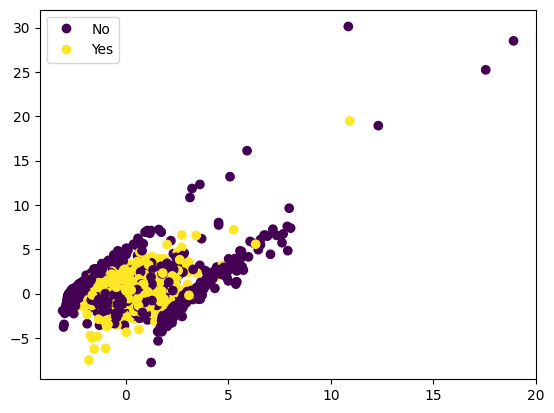

In [12]:
visualize_2pcs(PCA_x, y)
# YOUR CODE HERE

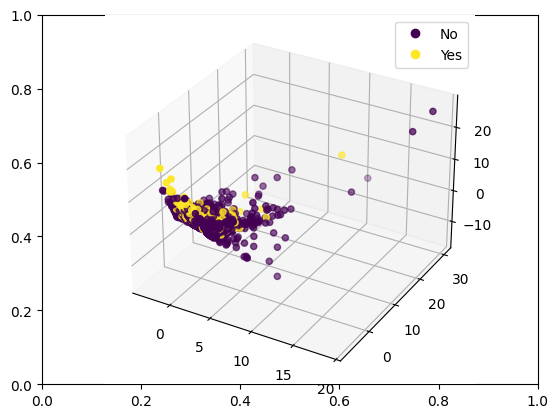

In [13]:
visualize_3pcs(PCA_x, y)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [14]:

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

def train(X, y, standardize=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    pipeline = Pipeline([
        ('standardize', StandardScaler() ),
        ('logistic_regression', LogisticRegression())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))

train(X, y, standardize=True)

              precision    recall  f1-score   support

           0       0.66      0.93      0.77       649
           1       0.45      0.11      0.17       351

    accuracy                           0.64      1000
   macro avg       0.55      0.52      0.47      1000
weighted avg       0.58      0.64      0.56      1000



Now apply the pipeline on the all the features `X` and review the performance

Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [15]:
def train_2(X_reduced, y):
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=0)
    pipeline = Pipeline([
       
        ('logistic_regression', LogisticRegression())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))


In [16]:
train_2(X_reduced, y)

              precision    recall  f1-score   support

           0       0.66      0.93      0.77       649
           1       0.45      0.11      0.17       351

    accuracy                           0.64      1000
   macro avg       0.55      0.52      0.47      1000
weighted avg       0.58      0.64      0.56      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [17]:
from sklearn.cluster import KMeans


2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        model = KMeans(n_clusters=k, random_state=10)
        model.fit(X)
        inertias.append(model.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')
    plt.show()



3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

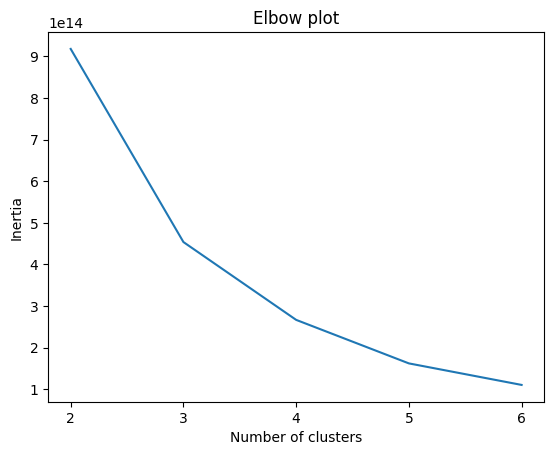

In [19]:
visualize_elbow(X, ks=[2, 3, 4, 5, 6])

4. What are the disadvantage to use the Elbow method? 

   we can be fully sure if the right number of clusters is right based on various use cases.

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [20]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.07760400974567547
For n_clusters = 3 The average silhouette_score is : 0.0695117301666191
For n_clusters = 4 The average silhouette_score is : 0.10097206984705226
For n_clusters = 5 The average silhouette_score is : 0.07699414641767034
For n_clusters = 6 The average silhouette_score is : 0.06886974773606355
For n_clusters = 7 The average silhouette_score is : 0.06329747293793928
For n_clusters = 8 The average silhouette_score is : 0.07767645957005291


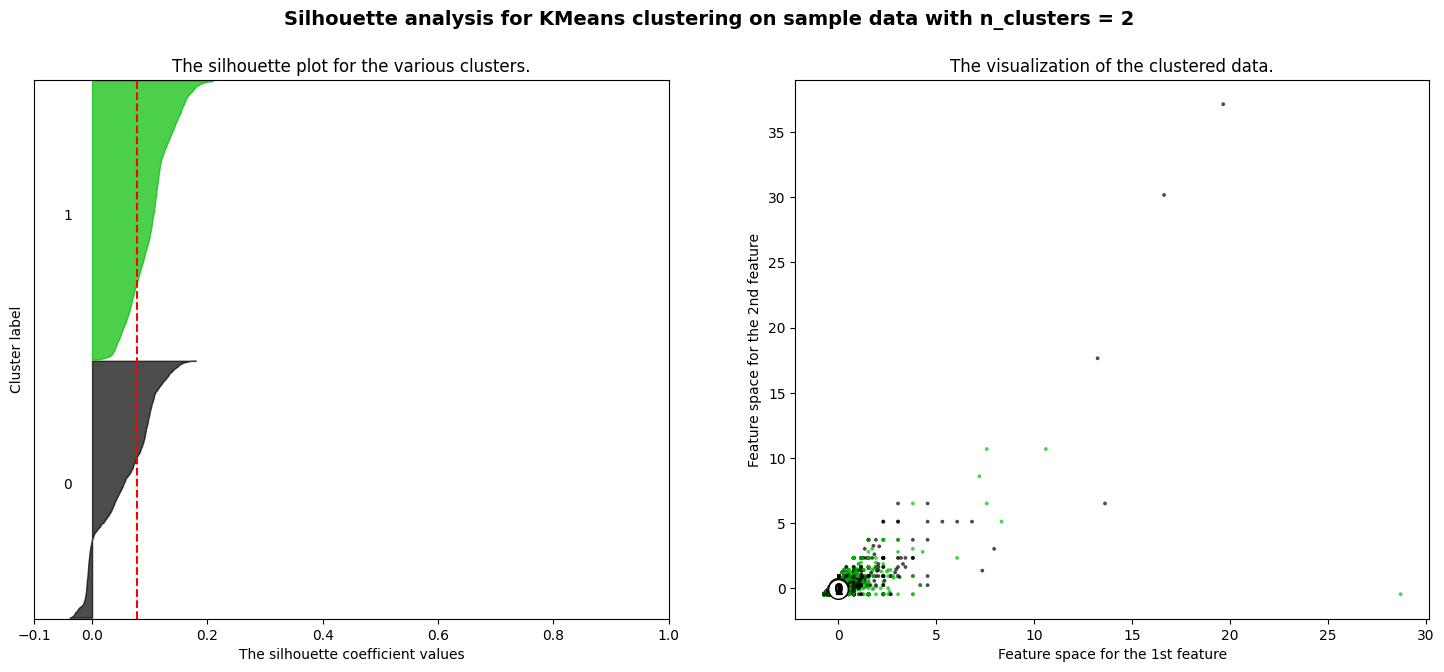

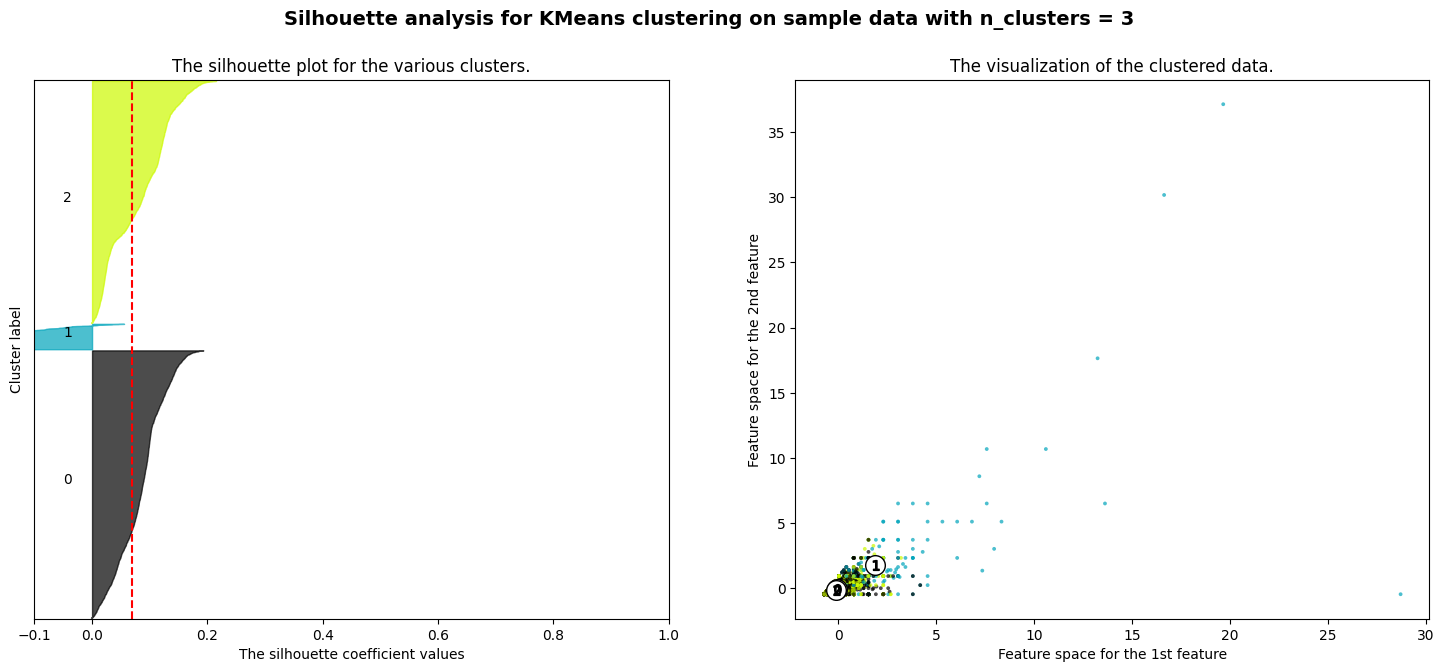

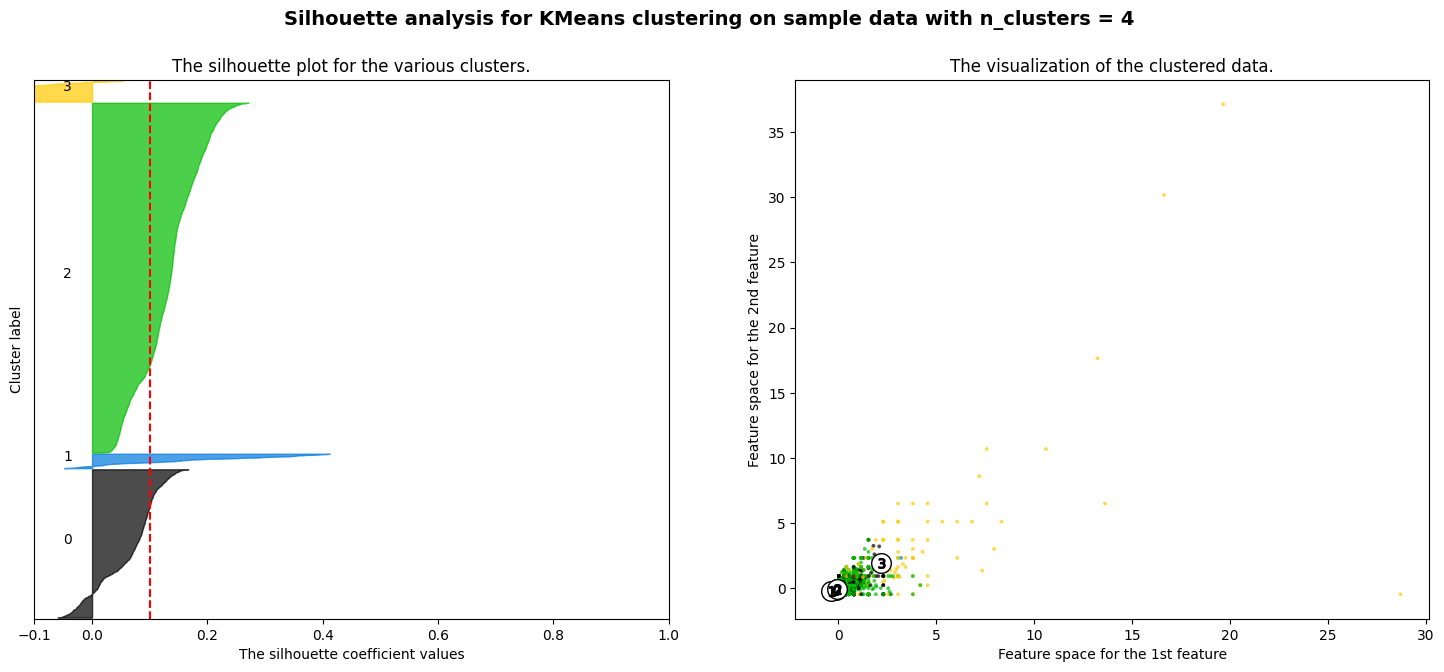

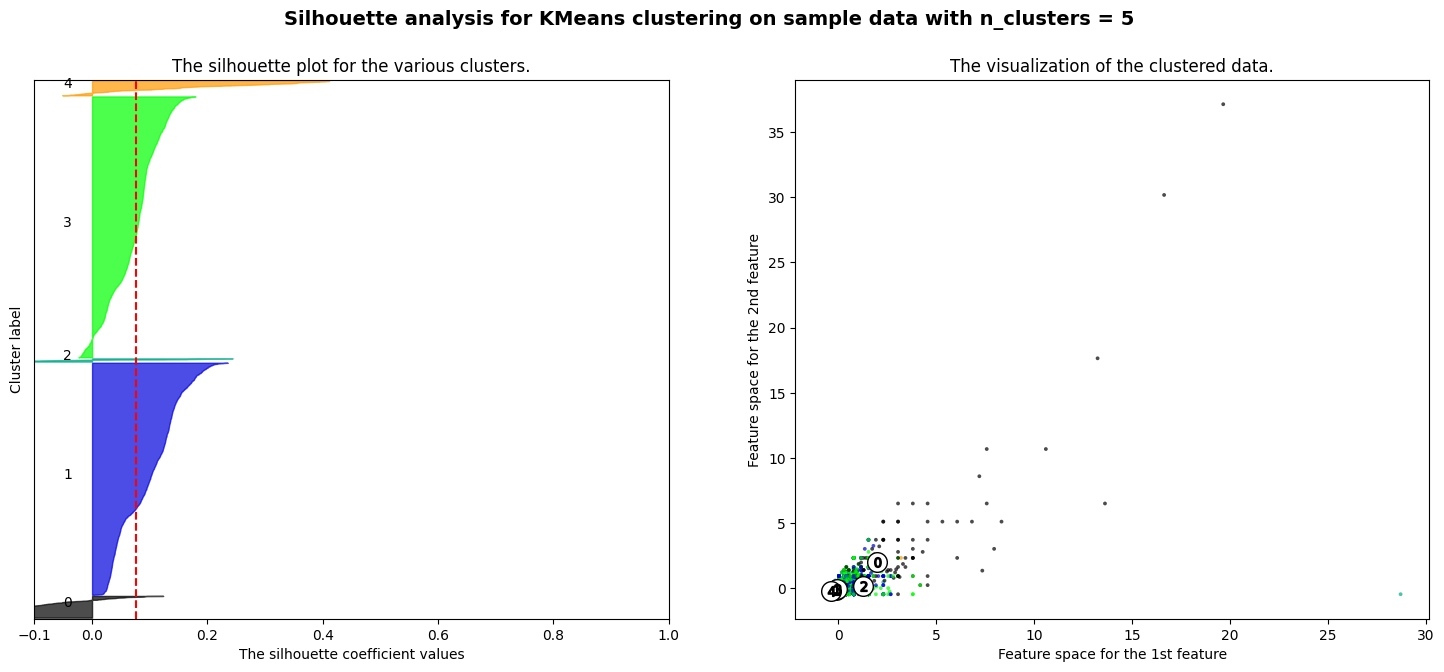

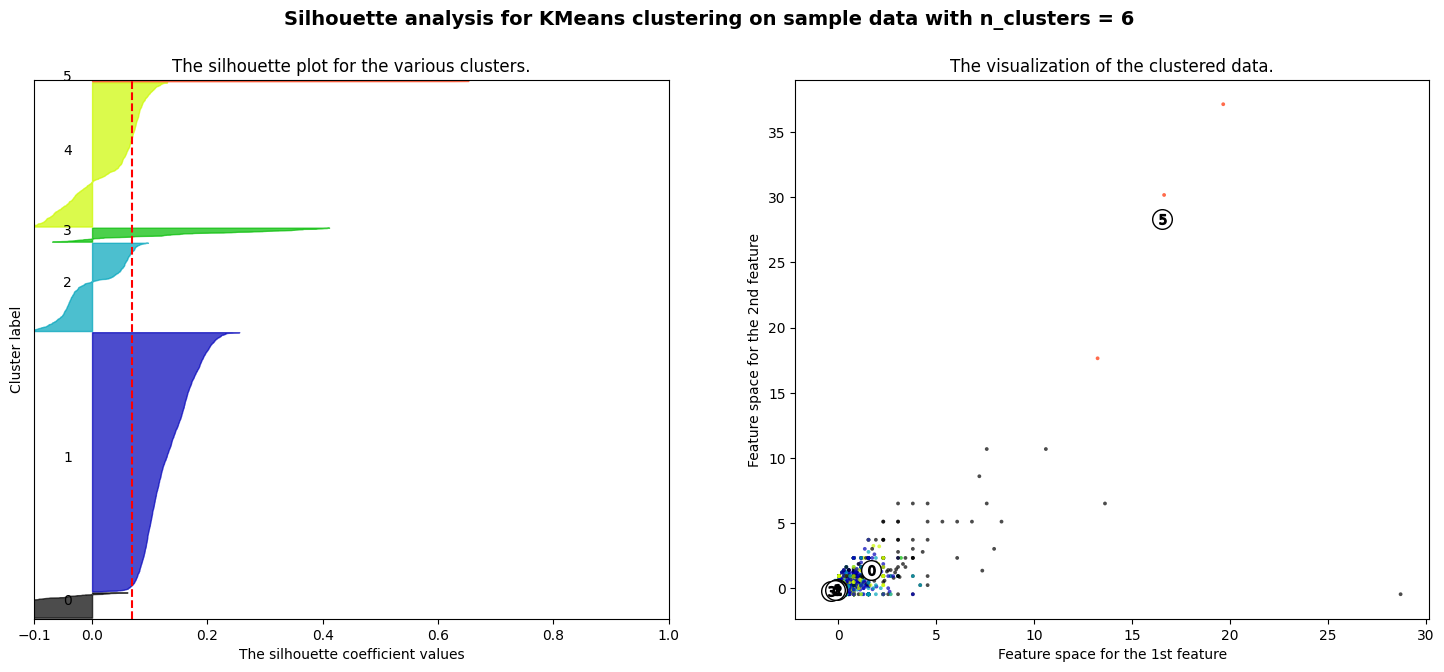

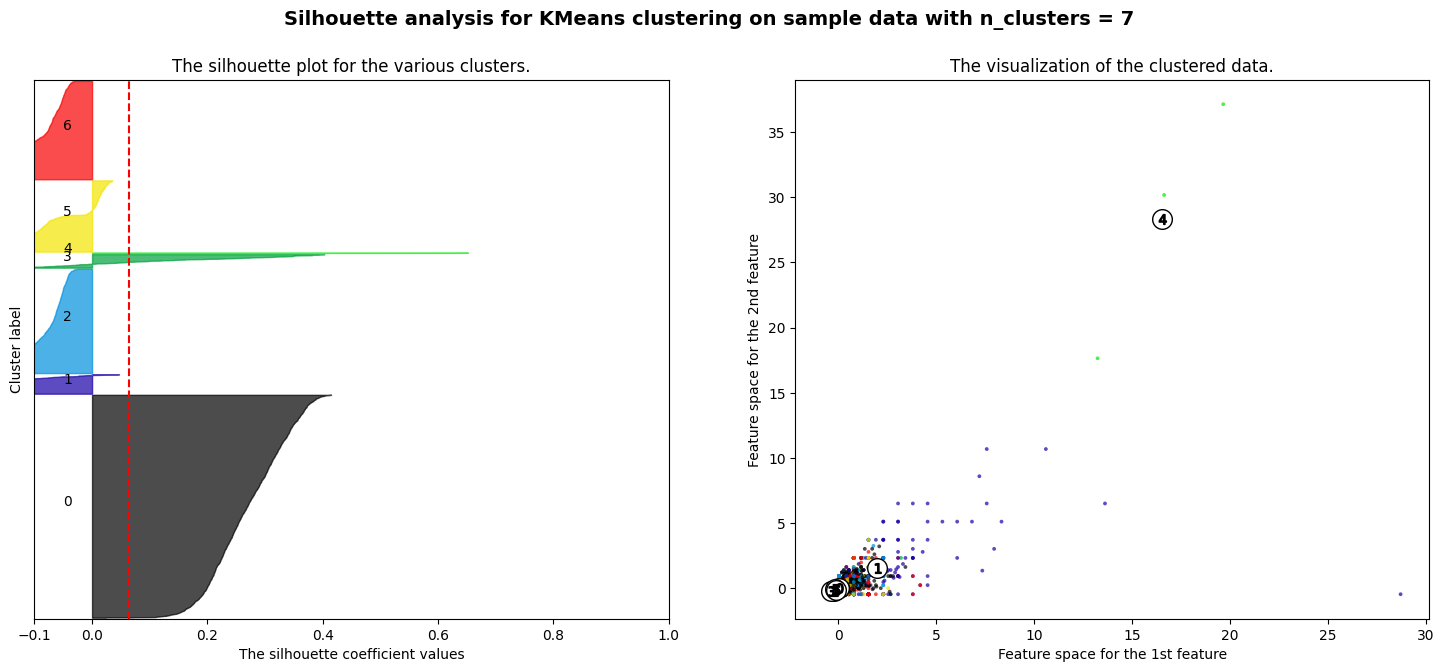

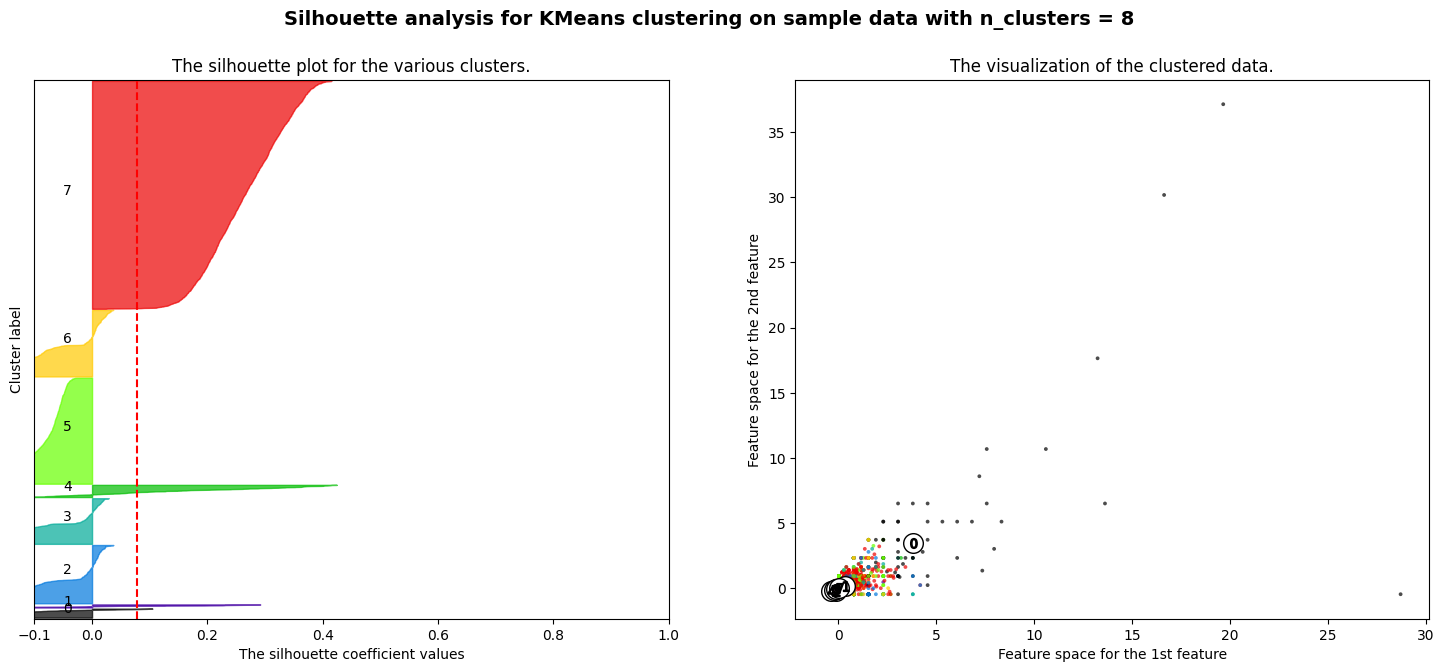

In [21]:
visualize_silhouette(8,X_reduced)

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [23]:
from sklearn.cluster import KMeans
# determine optimal number of clusters
inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_reduced)
    inertias.append(km.inertia_)

# instantiate k-means model with optimal number of clusters
km = KMeans(n_clusters=3, random_state=0)

# fit k-means model to reduced data
km.fit(X_reduced)

KMeans(n_clusters=3, random_state=0)

7. What is the size of each cluster?  

In [25]:
data['cluster_pca'].value_counts()

2    2530
1    2301
0     169
Name: cluster_pca, dtype: int64

8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [24]:
data['cluster_pca'] = km.predict(X_reduced)

data.head()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Category,cluster_pca
0,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,0.000,1.000,...,0.00,0.000,0.0,0.666667,0.333333,0.00,0.00,0.00,1.0,1
1,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,3.750,2.250,...,0.25,0.750,0.0,0.000000,0.250000,0.00,0.00,0.00,1.0,1
2,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,17.250,30.000,...,0.00,0.000,0.0,0.000000,0.750000,0.25,0.00,0.00,1.0,1
3,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,3.250,10.500,...,0.25,0.000,0.0,0.000000,0.500000,0.00,0.25,0.25,1.0,1
4,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,4.875,3.375,...,0.25,0.375,0.0,0.125000,0.250000,0.25,0.00,0.00,1.0,2


9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

    *YOUR ANSWER HERE*

In [28]:
data['cluster_pca'].value_counts()

2    2530
1    2301
0     169
Name: cluster_pca, dtype: int64

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

    *YOUR ANSWER HERE*

In [23]:
# YOUR CODE HERE

11. Jot down recommendations or followup steps, detailing the reasons.

    *YOUR ANSWER HERE*

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [26]:
new = pd.read_csv('../dat/new.csv.gz')

In [27]:
assert new.shape == (30091, 5)

In [28]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 5 vs 35 column

    And how does the feature set in the training set compare to the feature set in the test set? its about 34 columns less

In [29]:
data.shape 

(5000, 35)

In [30]:
new.shape

(30091, 5)

    *The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [32]:
np.intersect1d(df['product_id'],new['product_id'])

array([], dtype=int64)

In [31]:
df = pd.read_csv('../dat/past.csv.gz')

In [33]:
np.intersect1d(df['product_id'].values, new['product_id'].values)

array([], dtype=int64)

4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [51]:
new['Purchased?'].value_counts(normalize=True)

0    0.655744
1    0.344256
Name: Purchased?, dtype: float64

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [35]:
features = new.drop(['product_id', 'Purchased?'], axis=1)
target = new['Purchased?']

# convert features and target to numpy arrays
X = np.array(features)
y = np.array(target)

# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check shapes
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (24072, 3)
y_train shape: (24072,)
X_test shape: (6019, 3)
y_test shape: (6019,)


In [59]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fit logistic regression model on the training data
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the performance using accuracy score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.66      0.95      0.78      3909
           1       0.45      0.07      0.12      2110

    accuracy                           0.64      6019
   macro avg       0.55      0.51      0.45      6019
weighted avg       0.58      0.64      0.55      6019



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [39]:
import numpy as np
X = np.concatenate((X_train, X_test), axis=0)
print("Shape of X:", X.shape)


Shape of X: (30091, 3)


Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [44]:
X = np.concatenate((X_train, X_test), axis=0)
print("Shape of X:", X.shape)

Shape of X: (30091, 3)


In [65]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [47]:
import numpy as np
from sklearn.semi_supervised import LabelSpreading
from sklearn.neighbors import KNeighborsClassifier

# assume that you have X (features) and y (labels)

# Split the data into labeled and unlabeled examples
labeled_indices = np.random.choice(np.arange(y.shape[0]), size=100, replace=False)
unlabeled_indices = np.setdiff1d(np.arange(y.shape[0]), labeled_indices)

# Train the kNN classifier on labeled examples only
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X[labeled_indices], y[labeled_indices])

# Train the LabelSpreading model
lp_model = LabelSpreading(kernel='knn', alpha=0.01, n_neighbors=10, max_iter=30)
lp_model.fit(X, y)

LabelSpreading(alpha=0.01, kernel='knn', n_neighbors=10)

In [67]:
import numpy as np
from sklearn.semi_supervised import LabelSpreading
from sklearn.neighbors import KNeighborsClassifier

# assume that you have X (features) and y (labels)

# Split the data into labeled and unlabeled examples
labeled_indices = np.random.choice(np.arange(y.shape[0]), size=100, replace=False)
unlabeled_indices = np.setdiff1d(np.arange(y.shape[0]), labeled_indices)

# Train the kNN classifier on labeled examples only
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X[labeled_indices], y[labeled_indices])

# Train the LabelSpreading model
lp_model = LabelSpreading(kernel='knn', alpha=0.01, n_neighbors=10, max_iter=30)
lp_model.fit(X, y)

# Use the trained kNN classifier to predict the labels for the unlabeled examples
pred_labels = knn.predict(X[unlabeled_indices])

# Update the labels for the unlabeled examples using the predicted labels
y[unlabeled_indices] = pred_labels

# Retrain the LabelSpreading model using the updated labels
lp_model.fit(X, y)



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


LabelSpreading(alpha=0.01, kernel='knn', n_neighbors=10)

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [74]:

mask = np.isin(X, X_test).all(axis=1)

semi_sup_preds = lp_model.transduction_[mask]



10. Print the classification report

not fully understanding label spreading and not sure why this is not working

print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



    *YOUR ANSWER HERE*

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)